In [3]:
# import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from us_state_abbrev import states as abr

In [4]:
# create directories for data
codebook_csv = "../GunLaws/CodeBook-Table 1.csv"
database_csv = "../GunLaws/Database-Table 1.csv"
savefigdir = '../../'

In [5]:
# import codebook dataframe
codebook_df = pd.read_csv(codebook_csv)
codebook_df.head()

,Category Code,Category,Sub-Category,Variable Name,Brief Description of Provision,Detailed Description of Provision,Coding Notes,Coding Instructions,Notes,Data Source and Attribution
0,1,Dealer regulations,Licensing,dealer,State dealer license required for sale of all ...,All firearm dealers are required to have a sta...,State requires all persons engaged in the busi...,If all firearm dealers are required to have a ...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
1,1,Dealer regulations,Licensing,dealerh,State dealer license required for sale of hand...,All firearm dealers that sell handguns are req...,State requires all persons engaged in the busi...,If only dealers of handguns or handguns AND as...,NaN,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
2,1,Dealer regulations,Recordkeeping,recordsdealer,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
3,1,Dealer regulations,Recordkeeping,recordsdealerh,Licensed dealers are required to keep and reta...,Licensed dealers are required to keep and reta...,Recordkeeping refers to the recording of sales...,If record keeping and retention is required on...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."
4,1,Dealer regulations,Recordkeeping,recordsall,All private sellers and licensed dealers are r...,Both private sellers and licensed dealers are ...,Recordkeeping refers to the recording of sales...,If all private sellers and licensed dealers ar...,Federal law requires licensed dealers to keep ...,"Coded by Michael Siegel, MD, MPH, Boston Unive..."


In [6]:
# import database dataframe
database_df = pd.read_csv(database_csv)
database_df.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alaska,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,California,1991,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,58


In [7]:
db_2014_df = database_df.loc[database_df["year"]>=2014].reset_index(drop=True)
db_2014_df.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,2014,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10
1,Alaska,2014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Arizona,2014,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8
3,Arkansas,2014,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,California,2014,1,1,0,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,100


In [8]:
db_grouped_year = db_2014_df.groupby(['state','year'])
db_grouped_year['lawtotal'].value_counts()

state          year  lawtotal
Alabama        2014  10          1
               2015  10          1
               2016  10          1
               2017  10          1
               2018  10          1
Alaska         2014  3           1
               2015  3           1
               2016  3           1
               2017  3           1
               2018  3           1
Arizona        2014  8           1
               2015  8           1
               2016  8           1
               2017  8           1
               2018  8           1
Arkansas       2014  11          1
               2015  11          1
               2016  11          1
               2017  11          1
               2018  11          1
California     2014  100         1
               2015  102         1
               2016  104         1
               2017  106         1
               2018  109         1
Colorado       2014  30          1
               2015  30          1
               2016  30  

In [9]:
# create seperate dataframes for each gun law category
# create seperate variable string for each category from the codebook
# mutate data frame to include each category and variable name

codebook_df_m = codebook_df[['Category','Variable Name']]
cb_categories = codebook_df_m['Category'].unique()
print(cb_categories)

['Dealer regulations' 'Buyer regulations'
 'Prohibitions for high-risk gun possession' 'Background checks'
 'Ammunition regulations' 'Possession regulations'
 'Concealed carry permitting'
 'Assault weapons and large-capacity magazines' 'Child access prevention'
 'Gun trafficking' 'Stand your ground' 'Preemption' 'Immunity'
 'Domestic violence']


In [10]:
# create a dictionary of categories with the appropriate columns for each category
# create a seperate df and add the summary amounts through a loop

#dict
cat_frame = {}

#summary data frame with year and state
summary_df = db_2014_df.loc[:,('year','state')]

#loop through cb_categories list to create dict/df
for c in cb_categories:
    
    # use loc on codebook_df_m to get variable names as list
    cb_columns = codebook_df_m['Variable Name'].loc[codebook_df_m['Category']==c].unique()
    columns = ['year','state']
    columns.extend(cb_columns)

    # use columns variable as column list for db_2014_df headers
    #create temp data frame to load into dict and create summary column
    df_temp = db_2014_df.loc[:,columns]
    df_temp[c+'_Total'] = db_2014_df.loc[:,cb_columns].sum(axis=1)
    
    #populate summary column only to summary dataframe
    summary_df[c+'_Total'] = db_2014_df.loc[:,cb_columns].sum(axis=1)
    cat_frame[c] = df_temp

In [11]:
# cat_frame['Domestic violence'].head(20)
summary_df.loc[summary_df['state']=='South Dakota']

,year,state,Dealer regulations_Total,Buyer regulations_Total,Prohibitions for high-risk gun possession_Total,Background checks_Total,Ammunition regulations_Total,Possession regulations_Total,Concealed carry permitting_Total,Assault weapons and large-capacity magazines_Total,Child access prevention_Total,Gun trafficking_Total,Stand your ground_Total,Preemption_Total,Immunity_Total,Domestic violence_Total
40,2014,South Dakota,0,0,1,0,0,0,3,0,0,0,0,0,0,1
90,2015,South Dakota,0,0,1,0,0,0,3,0,0,0,0,0,0,1
140,2016,South Dakota,0,0,1,0,0,0,3,0,0,0,0,0,0,1
190,2017,South Dakota,0,0,1,0,0,0,3,0,0,0,0,0,0,1
240,2018,South Dakota,0,0,1,0,0,0,3,0,0,0,0,0,0,1


In [12]:
# get count of laws total for states and print to csv

# total laws by state and year
tot_sum_df = summary_df.loc[:,('state','year')]
tot_sum_df['LawTotal'] = summary_df.iloc[:,2:-1].sum(axis=1)

# groupby and unstack
ts_grouped = tot_sum_df.groupby(['state','year'])
# ts_grouped.mean()
piv_tot_sum_df = ts_grouped.mean().unstack(-1)
piv_tot_sum_df.columns = piv_tot_sum_df.columns.droplevel(0)
piv_tot_sum_df=piv_tot_sum_df.reset_index()


In [13]:
#print dfs to csv
piv_tot_sum_df.to_csv('../StateGunLawCountByYear.csv',index=False)
summary_df.to_csv('../StateGunLawCategories_2014-2018.csv',index=False)

In [14]:
#create 2014 df
df_2014 = summary_df.loc[summary_df['year']==2014]
df_2015 = summary_df.loc[summary_df['year']==2015]
df_2016 = summary_df.loc[summary_df['year']==2016]
df_2017 = summary_df.loc[summary_df['year']==2017]
print(list(df_2017))
df_2017.head()

['year', 'state', 'Dealer regulations_Total', 'Buyer regulations_Total', 'Prohibitions for high-risk gun possession_Total', 'Background checks_Total', 'Ammunition regulations_Total', 'Possession regulations_Total', 'Concealed carry permitting_Total', 'Assault weapons and large-capacity magazines_Total', 'Child access prevention_Total', 'Gun trafficking_Total', 'Stand your ground_Total', 'Preemption_Total', 'Immunity_Total', 'Domestic violence_Total']


,year,state,Dealer regulations_Total,Buyer regulations_Total,Prohibitions for high-risk gun possession_Total,Background checks_Total,Ammunition regulations_Total,Possession regulations_Total,Concealed carry permitting_Total,Assault weapons and large-capacity magazines_Total,Child access prevention_Total,Gun trafficking_Total,Stand your ground_Total,Preemption_Total,Immunity_Total,Domestic violence_Total
150,2017,Alabama,1,0,3,0,0,0,4,0,0,0,0,0,0,2
151,2017,Alaska,0,1,1,0,0,1,0,0,0,0,0,0,0,0
152,2017,Arizona,0,0,4,0,0,1,0,0,0,0,0,0,0,3
153,2017,Arkansas,0,0,3,0,0,2,5,0,0,0,1,0,0,0
154,2017,California,14,12,7,11,4,7,6,8,9,6,1,2,1,18


In [15]:
hlist = list(df_2017)
rlist = ['year','state']
hlist.remove('year')
hlist.remove('state')
print(hlist)
print(len(hlist))

['Dealer regulations_Total', 'Buyer regulations_Total', 'Prohibitions for high-risk gun possession_Total', 'Background checks_Total', 'Ammunition regulations_Total', 'Possession regulations_Total', 'Concealed carry permitting_Total', 'Assault weapons and large-capacity magazines_Total', 'Child access prevention_Total', 'Gun trafficking_Total', 'Stand your ground_Total', 'Preemption_Total', 'Immunity_Total', 'Domestic violence_Total']
14


In [16]:
print(abr)

{'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands', 'VT': 'V

TypeError: unsupported operand type(s) for -: 'str' and 'float'

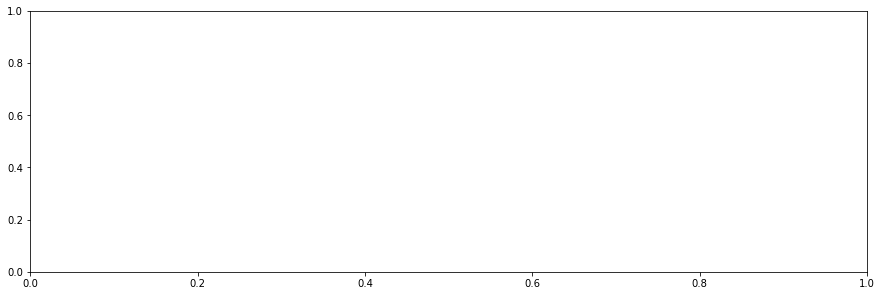

In [17]:
# create a stacked bar chart (categories) of the states gunlaws for each year

dflist = [df_2014,df_2015,df_2016,df_2017]
fname = "Law Count by State in "
year = 2014
for df in dflist:
    cat1 = df[hlist[0]]
    cat2 = df[hlist[1]]
    cat3 = df[hlist[2]]
    cat4 = df[hlist[3]]
    cat5 = df[hlist[4]]
    cat6 = df[hlist[5]]
    cat7 = df[hlist[6]]
    cat8 = df[hlist[7]]
    cat9 = df[hlist[8]]
    cat10 = df[hlist[9]]
    cat11 = df[hlist[10]]
    cat12 = df[hlist[11]]
    cat13 = df[hlist[12]]
    cat14 = df[hlist[13]]
    
    lgroup=[l.replace('_Total','') for l in hlist]
    
    
    plt.figure(figsize=(15,4.8))
    plt.bar(df['state'],cat1,color='black',edgecolor='white',width=1)
    plt.bar(df['state'],cat2,bottom=cat1,color='saddlebrown',edgecolor='white',width=1)
    plt.bar(df['state'],cat3,bottom=cat2+cat1,color='chocolate',edgecolor='white',width=1)
    plt.bar(df['state'],cat4,bottom=cat3+cat2+cat1,color='darkorange',edgecolor='white',width=1)
    plt.bar(df['state'],cat5,bottom=cat4+cat3+cat2+cat1,color='orangered',edgecolor='white',width=1)
    plt.bar(df['state'],cat6,bottom=cat5+cat4+cat3+cat2+cat1
            ,color='firebrick',edgecolor='white',width=1)
    plt.bar(df['state'],cat7,bottom=cat6+cat5+cat4+cat3+cat2+cat1
            ,color='red',edgecolor='white',width=1)
    plt.bar(df['state'],cat8,bottom=cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='magenta',edgecolor='white',width=1)
    plt.bar(df['state'],cat9,bottom=cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='blueviolet',edgecolor='white',width=1)
    plt.bar(df['state'],cat10,bottom=cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='blue',edgecolor='white',width=1)
    plt.bar(df['state'],cat11,bottom=cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='c',edgecolor='white',width=1)
    plt.bar(df['state'],cat12,bottom=cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='mediumseagreen',edgecolor='white',width=1)
    plt.bar(df['state'],cat13,bottom=cat12+cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='green',edgecolor='white',width=1)
    plt.bar(df['state'],cat14,bottom=cat13+cat12+cat11+cat10+cat9+cat8+cat7+cat6+cat5+cat4+cat3+cat2+cat1
            ,color='greenyellow',edgecolor='white',width=1)
    plt.xticks(rotation=90)
    plt.title(fname + str(year))
    plt.xlabel('States')
    plt.ylabel('Count of Laws')
    plt.xlim('Alabama','Wyoming')
    plt.legend(lgroup,loc='center left',bbox_to_anchor=(1,0.5))
    plt.tight_layout()
    plt.savefig(savefigdir+fname + str(year),frameon=True)
    year = year+1
   

In [20]:
piv_tot_sum_df['Change2015'] = piv_tot_sum_df[2014]-piv_tot_sum_df[2015]
piv_tot_sum_df['Change2016'] = piv_tot_sum_df[2015]-piv_tot_sum_df[2016]
piv_tot_sum_df['Change2017'] = piv_tot_sum_df[2016]-piv_tot_sum_df[2017]
piv_tot_sum_df['ChangeTotal'] = piv_tot_sum_df[2014]-piv_tot_sum_df[2017]
df_years = piv_tot_sum_df



TypeError: unsupported operand type(s) for -: 'str' and 'float'

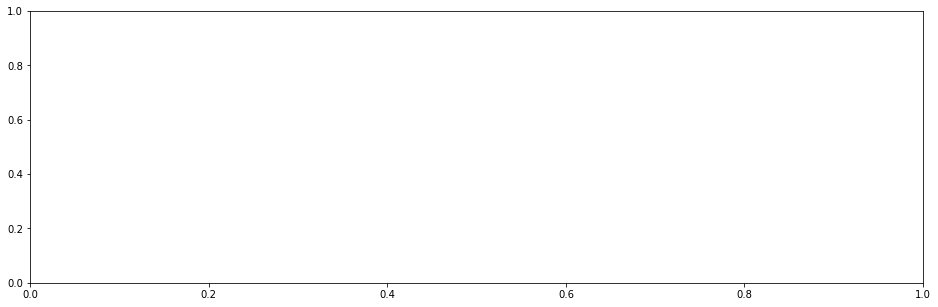

In [21]:
plt.figure(figsize=(16,5))
plt.bar(df_years['state'],df_years['ChangeTotal'],color='grey')
plt.xticks(rotation=90)
plt.title("Net Change in Gun Laws Between 2014-2017")
# plt.xlim('Alabama','Wyoming')
plt.ylim(-12,12)
plt.xlabel('States')
plt.ylabel('Number of Law Changes')
for i, c in enumerate(df_years['ChangeTotal']):
    if c < 0:
        txt = c-1
        color='red'
    elif c > 0:
        txt = c+.5
        color='blue'
    else:
        txt=-0.5
        color='black'
    plt.text(i-.25,txt,str(c), color=color, fontweight='bold')
plt.tight_layout()
plt.savefig(savefigdir+'Net Change in Gun Laws.png')
plt.show()

In [22]:
# compare crimes to gun laws
# import crime data
crimedf = pd.read_csv('../Crime_Results.csv')
crimedf.head()

# #get statename
abbv = pd.DataFrame.from_dict(abr,orient = 'index', columns= ['state name']).reset_index()
abbv.head()
statecrime_df =crimedf.merge(abbv, how="left",left_on ="index", right_on="index")
statecrime_df.head()
statecrimes=statecrime_df.sort_values('state name')
statecrimes.head()
statecrimes = statecrimes.loc[statecrimes['index']!='DC']

print(statecrimes.shape)
print(df_years.shape)

(50, 11)
(50, 10)


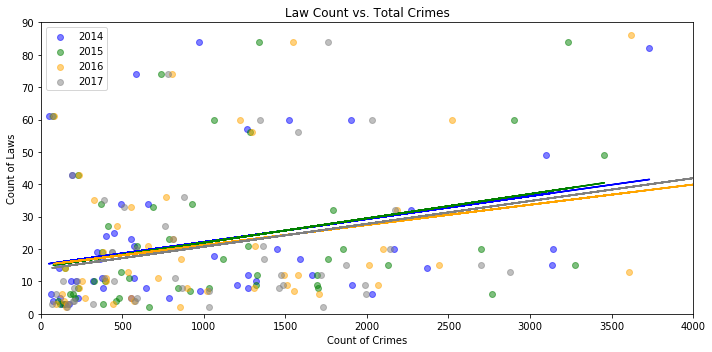

In [102]:

x1=statecrimes['2014']
y1=df_years[2014]
x2=statecrimes['2015']
y2=df_years[2015]
x3=statecrimes['2016']
y3=df_years[2016]
x4=statecrimes['2017']
y4=df_years[2017]
plt.figure(figsize=(10,5))
plt.scatter(x1,y1,alpha=.5,color='blue')
plt.scatter(x2,y2,alpha=.5,color='green')
plt.scatter(x3,y3,alpha=.5,color='orange')
plt.scatter(x4,y4,alpha=.5,color='grey')
z1= np.polyfit(x1,y1,1)
p1= np.poly1d(z1)
z2= np.polyfit(x2,y2,1)
p2= np.poly1d(z2)
z3= np.polyfit(x3,y3,1)
p3= np.poly1d(z3)
z4= np.polyfit(x4,y4,1)
p4= np.poly1d(z4)
plt.plot(x1,p1(x1),color='blue')
plt.plot(x2,p2(x2),color='green')
plt.plot(x3,p3(x3),color='orange')
plt.plot(x4,p4(x4),color='grey')

plt.title('Law Count vs. Total Crimes')
plt.xlim(0,4000)
plt.ylim(0,90)
plt.ylabel('Count of Laws')
plt.xlabel('Count of Crimes')
plt.legend()
plt.tight_layout()
plt.savefig(savefigdir+'Law Count vs. Total Crimes.png')
plt.show()